In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [25]:
years = [2024,2023,2022,2019, 2018, 2017, 2016]  # สามารถเพิ่มหลายปีได้
months = ["january", "february", "march", "april", "may", "june","october", "november", "december"]


url_template = 'https://www.basketball-reference.com/leagues/NBA_{}_games-{}.html'

url_list = []
for year in years:
    for month in months:
        url = url_template.format(year, month)
        url_list.append(url)


In [26]:
years1 = [2020]  # สามารถเพิ่มหลายปีได้
months1 = ["january", "february", "march", "april", "july","october-2019", "november", "december","october-2020","september"]

for year1 in years1:
    for month1 in months1:
        url1 = url_template.format(year1, month1)
        url_list.append(url1)

In [27]:
years2 = [2021]  # สามารถเพิ่มหลายปีได้
months2 = ["january", "february", "march", "april", "july","may", "june", "december"]

for year2 in years2:
    for month2 in months2:
        url2 = url_template.format(year2, month2)
        url_list.append(url2)

In [28]:
years3 = [2025]  # สามารถเพิ่มหลายปีได้
months3 = ["january", "february", "march", "april","october", "november", "december"]

for year3 in years3:
    for month3 in months3:
        url3 = url_template.format(year3, month3)
        url_list.append(url3)

In [29]:
df = pd.DataFrame()

for i in url_list:
  df1 = pd.read_html(i, header=0)[0] # Access the first DataFrame (index 0)

  df = pd.concat([df, df1], ignore_index=True)
  time.sleep(2)

In [30]:
df

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes
0,"Mon, Jan 1, 2024",3:00p,Minnesota Timberwolves,106,New York Knicks,112,Box Score,NaN,19812.0,2:28,Madison Square Garden (IV),NaN
1,"Mon, Jan 1, 2024",7:30p,Cleveland Cavaliers,121,Toronto Raptors,124,Box Score,NaN,19800.0,2:28,Scotiabank Arena,NaN
2,"Mon, Jan 1, 2024",8:00p,Detroit Pistons,113,Houston Rockets,136,Box Score,NaN,18055.0,2:06,Toyota Center,NaN
3,"Mon, Jan 1, 2024",8:00p,Indiana Pacers,122,Milwaukee Bucks,113,Box Score,NaN,17922.0,2:22,Fiserv Forum,NaN
4,"Mon, Jan 1, 2024",9:00p,Charlotte Hornets,93,Denver Nuggets,111,Box Score,NaN,19625.0,2:01,Ball Arena,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12747,"Tue, Dec 31, 2024",3:00p,Milwaukee Bucks,120,Indiana Pacers,112,Box Score,NaN,17274,2:24,Gainbridge Fieldhouse,NaN
12748,"Tue, Dec 31, 2024",7:00p,Los Angeles Clippers,86,San Antonio Spurs,122,Box Score,NaN,18690,2:03,Frost Bank Center,NaN
12749,"Tue, Dec 31, 2024",8:00p,Minnesota Timberwolves,105,Oklahoma City Thunder,113,Box Score,NaN,18203,2:09,Paycom Center,NaN
12750,"Tue, Dec 31, 2024",9:00p,Cleveland Cavaliers,122,Los Angeles Lakers,110,Box Score,NaN,18997,2:03,Crypto.com Arena,NaN


In [31]:
df[['DayOfWeek', 'Month', 'Day', 'Year']] = df['Date'].str.extract(r'(\w+), (\w+) (\d+), (\d+)')
df.drop('Date', axis=1, inplace=True)
df


,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes,DayOfWeek,Month,Day,Year
0,3:00p,Minnesota Timberwolves,106,New York Knicks,112,Box Score,NaN,19812.0,2:28,Madison Square Garden (IV),NaN,Mon,Jan,1,2024
1,7:30p,Cleveland Cavaliers,121,Toronto Raptors,124,Box Score,NaN,19800.0,2:28,Scotiabank Arena,NaN,Mon,Jan,1,2024
2,8:00p,Detroit Pistons,113,Houston Rockets,136,Box Score,NaN,18055.0,2:06,Toyota Center,NaN,Mon,Jan,1,2024
3,8:00p,Indiana Pacers,122,Milwaukee Bucks,113,Box Score,NaN,17922.0,2:22,Fiserv Forum,NaN,Mon,Jan,1,2024
4,9:00p,Charlotte Hornets,93,Denver Nuggets,111,Box Score,NaN,19625.0,2:01,Ball Arena,NaN,Mon,Jan,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12747,3:00p,Milwaukee Bucks,120,Indiana Pacers,112,Box Score,NaN,17274,2:24,Gainbridge Fieldhouse,NaN,Tue,Dec,31,2024
12748,7:00p,Los Angeles Clippers,86,San Antonio Spurs,122,Box Score,NaN,18690,2:03,Frost Bank Center,NaN,Tue,Dec,31,2024
12749,8:00p,Minnesota Timberwolves,105,Oklahoma City Thunder,113,Box Score,NaN,18203,2:09,Paycom Center,NaN,Tue,Dec,31,2024
12750,9:00p,Cleveland Cavaliers,122,Los Angeles Lakers,110,Box Score,NaN,18997,2:03,Crypto.com Arena,NaN,Tue,Dec,31,2024


In [32]:
df["Year"].unique()

array(['2024', '2023', '2022', '2021', '2019', nan, '2018', '2017',
       '2016', '2015', '2020', '2025'], dtype=object)

In [33]:
df.describe()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes,DayOfWeek,Month,Day,Year
count,12752,12752,12539,12752,12539,12539,680,12478.0,12510,12637,178,12748,12748,12748,12748
unique,31,31,163,31,159,2,5,4933.0,90,64,7,7,11,31,11
top,8:00p,Boston Celtics,109,Boston Celtics,112,Box Score,OT,0.0,2:13,STAPLES Center,In-Season Tournament,Wed,Jan,23,2021
freq,2809,462,387,472,404,12535,598,585.0,595,487,67,2417,2245,510,1631


In [34]:
df.isna()
# เช็คว่ามี NaN หรือไม่
print(df.isna().sum())  # นับจำนวน NaN ในแต่ละคอลัมน์
print(df.isna().any().any())  # คืนค่า True ถ้ามี NaN อย่างน้อย 1 ค่า


Start (ET)             0
Visitor/Neutral        0
PTS                  213
Home/Neutral           0
PTS.1                213
Unnamed: 6           213
Unnamed: 7         12072
Attend.              274
LOG                  242
Arena                115
Notes              12574
DayOfWeek              4
Month                  4
Day                    4
Year                   4
dtype: int64
True


In [35]:
df.rename(columns={"PTS": "A","PTS.1": "B"}, inplace=True)
df

,Start (ET),Visitor/Neutral,A,Home/Neutral,B,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes,DayOfWeek,Month,Day,Year
0,3:00p,Minnesota Timberwolves,106,New York Knicks,112,Box Score,NaN,19812.0,2:28,Madison Square Garden (IV),NaN,Mon,Jan,1,2024
1,7:30p,Cleveland Cavaliers,121,Toronto Raptors,124,Box Score,NaN,19800.0,2:28,Scotiabank Arena,NaN,Mon,Jan,1,2024
2,8:00p,Detroit Pistons,113,Houston Rockets,136,Box Score,NaN,18055.0,2:06,Toyota Center,NaN,Mon,Jan,1,2024
3,8:00p,Indiana Pacers,122,Milwaukee Bucks,113,Box Score,NaN,17922.0,2:22,Fiserv Forum,NaN,Mon,Jan,1,2024
4,9:00p,Charlotte Hornets,93,Denver Nuggets,111,Box Score,NaN,19625.0,2:01,Ball Arena,NaN,Mon,Jan,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12747,3:00p,Milwaukee Bucks,120,Indiana Pacers,112,Box Score,NaN,17274,2:24,Gainbridge Fieldhouse,NaN,Tue,Dec,31,2024
12748,7:00p,Los Angeles Clippers,86,San Antonio Spurs,122,Box Score,NaN,18690,2:03,Frost Bank Center,NaN,Tue,Dec,31,2024
12749,8:00p,Minnesota Timberwolves,105,Oklahoma City Thunder,113,Box Score,NaN,18203,2:09,Paycom Center,NaN,Tue,Dec,31,2024
12750,9:00p,Cleveland Cavaliers,122,Los Angeles Lakers,110,Box Score,NaN,18997,2:03,Crypto.com Arena,NaN,Tue,Dec,31,2024


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12752 entries, 0 to 12751
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Start (ET)       12752 non-null  object
 1   Visitor/Neutral  12752 non-null  object
 2   A                12539 non-null  object
 3   Home/Neutral     12752 non-null  object
 4   B                12539 non-null  object
 5   Unnamed: 6       12539 non-null  object
 6   Unnamed: 7       680 non-null    object
 7   Attend.          12478 non-null  object
 8   LOG              12510 non-null  object
 9   Arena            12637 non-null  object
 10  Notes            178 non-null    object
 11  DayOfWeek        12748 non-null  object
 12  Month            12748 non-null  object
 13  Day              12748 non-null  object
 14  Year             12748 non-null  object
dtypes: object(15)
memory usage: 1.5+ MB


In [37]:
# แปลงคอลัมน์คะแนนให้เป็นตัวเลข
df['A'] = pd.to_numeric(df['A'], errors='coerce')  # แปลงค่าที่ไม่ใช่ตัวเลขเป็น NaN
df['B'] = pd.to_numeric(df['B'], errors='coerce')
df.info()
# # ตรวจสอบว่ามีค่า NaN หรือไม่
# if df[['A', 'B']].isna().sum().sum() > 0:
#     print("⚠️ พบค่าที่ไม่ใช่ตัวเลขในคอลัมน์ PTS หรือ PTS.1 กรุณาตรวจสอบข้อมูลของคุณ!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12752 entries, 0 to 12751
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Start (ET)       12752 non-null  object 
 1   Visitor/Neutral  12752 non-null  object 
 2   A                12535 non-null  float64
 3   Home/Neutral     12752 non-null  object 
 4   B                12535 non-null  float64
 5   Unnamed: 6       12539 non-null  object 
 6   Unnamed: 7       680 non-null    object 
 7   Attend.          12478 non-null  object 
 8   LOG              12510 non-null  object 
 9   Arena            12637 non-null  object 
 10  Notes            178 non-null    object 
 11  DayOfWeek        12748 non-null  object 
 12  Month            12748 non-null  object 
 13  Day              12748 non-null  object 
 14  Year             12748 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.5+ MB


In [38]:
df['outcome'] = df.apply(lambda row: row['Home/Neutral'] if row['B'] - row['A'] > 0 else row['Visitor/Neutral'], axis=1)
df

,Start (ET),Visitor/Neutral,A,Home/Neutral,B,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes,DayOfWeek,Month,Day,Year,outcome
0,3:00p,Minnesota Timberwolves,106.0,New York Knicks,112.0,Box Score,NaN,19812.0,2:28,Madison Square Garden (IV),NaN,Mon,Jan,1,2024,New York Knicks
1,7:30p,Cleveland Cavaliers,121.0,Toronto Raptors,124.0,Box Score,NaN,19800.0,2:28,Scotiabank Arena,NaN,Mon,Jan,1,2024,Toronto Raptors
2,8:00p,Detroit Pistons,113.0,Houston Rockets,136.0,Box Score,NaN,18055.0,2:06,Toyota Center,NaN,Mon,Jan,1,2024,Houston Rockets
3,8:00p,Indiana Pacers,122.0,Milwaukee Bucks,113.0,Box Score,NaN,17922.0,2:22,Fiserv Forum,NaN,Mon,Jan,1,2024,Indiana Pacers
4,9:00p,Charlotte Hornets,93.0,Denver Nuggets,111.0,Box Score,NaN,19625.0,2:01,Ball Arena,NaN,Mon,Jan,1,2024,Denver Nuggets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12747,3:00p,Milwaukee Bucks,120.0,Indiana Pacers,112.0,Box Score,NaN,17274,2:24,Gainbridge Fieldhouse,NaN,Tue,Dec,31,2024,Milwaukee Bucks
12748,7:00p,Los Angeles Clippers,86.0,San Antonio Spurs,122.0,Box Score,NaN,18690,2:03,Frost Bank Center,NaN,Tue,Dec,31,2024,San Antonio Spurs
12749,8:00p,Minnesota Timberwolves,105.0,Oklahoma City Thunder,113.0,Box Score,NaN,18203,2:09,Paycom Center,NaN,Tue,Dec,31,2024,Oklahoma City Thunder
12750,9:00p,Cleveland Cavaliers,122.0,Los Angeles Lakers,110.0,Box Score,NaN,18997,2:03,Crypto.com Arena,NaN,Tue,Dec,31,2024,Cleveland Cavaliers


In [39]:
df = df.drop(['Unnamed: 6','Unnamed: 7','Notes', 'LOG'], axis = 1)
df

,Start (ET),Visitor/Neutral,A,Home/Neutral,B,Attend.,Arena,DayOfWeek,Month,Day,Year,outcome
0,3:00p,Minnesota Timberwolves,106.0,New York Knicks,112.0,19812.0,Madison Square Garden (IV),Mon,Jan,1,2024,New York Knicks
1,7:30p,Cleveland Cavaliers,121.0,Toronto Raptors,124.0,19800.0,Scotiabank Arena,Mon,Jan,1,2024,Toronto Raptors
2,8:00p,Detroit Pistons,113.0,Houston Rockets,136.0,18055.0,Toyota Center,Mon,Jan,1,2024,Houston Rockets
3,8:00p,Indiana Pacers,122.0,Milwaukee Bucks,113.0,17922.0,Fiserv Forum,Mon,Jan,1,2024,Indiana Pacers
4,9:00p,Charlotte Hornets,93.0,Denver Nuggets,111.0,19625.0,Ball Arena,Mon,Jan,1,2024,Denver Nuggets
...,...,...,...,...,...,...,...,...,...,...,...,...
12747,3:00p,Milwaukee Bucks,120.0,Indiana Pacers,112.0,17274,Gainbridge Fieldhouse,Tue,Dec,31,2024,Milwaukee Bucks
12748,7:00p,Los Angeles Clippers,86.0,San Antonio Spurs,122.0,18690,Frost Bank Center,Tue,Dec,31,2024,San Antonio Spurs
12749,8:00p,Minnesota Timberwolves,105.0,Oklahoma City Thunder,113.0,18203,Paycom Center,Tue,Dec,31,2024,Oklahoma City Thunder
12750,9:00p,Cleveland Cavaliers,122.0,Los Angeles Lakers,110.0,18997,Crypto.com Arena,Tue,Dec,31,2024,Cleveland Cavaliers


In [40]:
df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"] + "-" + df["Day"].astype(str))

# ลบคอลัมน์เก่าที่ไม่จำเป็น
df.drop(columns=["Month", "Day"], inplace=True)
df

,Start (ET),Visitor/Neutral,A,Home/Neutral,B,Attend.,Arena,DayOfWeek,Year,outcome,Date
0,3:00p,Minnesota Timberwolves,106.0,New York Knicks,112.0,19812.0,Madison Square Garden (IV),Mon,2024,New York Knicks,2024-01-01
1,7:30p,Cleveland Cavaliers,121.0,Toronto Raptors,124.0,19800.0,Scotiabank Arena,Mon,2024,Toronto Raptors,2024-01-01
2,8:00p,Detroit Pistons,113.0,Houston Rockets,136.0,18055.0,Toyota Center,Mon,2024,Houston Rockets,2024-01-01
3,8:00p,Indiana Pacers,122.0,Milwaukee Bucks,113.0,17922.0,Fiserv Forum,Mon,2024,Indiana Pacers,2024-01-01
4,9:00p,Charlotte Hornets,93.0,Denver Nuggets,111.0,19625.0,Ball Arena,Mon,2024,Denver Nuggets,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...
12747,3:00p,Milwaukee Bucks,120.0,Indiana Pacers,112.0,17274,Gainbridge Fieldhouse,Tue,2024,Milwaukee Bucks,2024-12-31
12748,7:00p,Los Angeles Clippers,86.0,San Antonio Spurs,122.0,18690,Frost Bank Center,Tue,2024,San Antonio Spurs,2024-12-31
12749,8:00p,Minnesota Timberwolves,105.0,Oklahoma City Thunder,113.0,18203,Paycom Center,Tue,2024,Oklahoma City Thunder,2024-12-31
12750,9:00p,Cleveland Cavaliers,122.0,Los Angeles Lakers,110.0,18997,Crypto.com Arena,Tue,2024,Cleveland Cavaliers,2024-12-31


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoifmsaz5/hve28fli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoifmsaz5/4cvb_pil.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58840', 'data', 'file=/tmp/tmpoifmsaz5/hve28fli.json', 'init=/tmp/tmpoifmsaz5/4cvb_pil.json', 'output', 'file=/tmp/tmpoifmsaz5/prophet_modelhvnu2tf3/prophet_model-20250403060721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:07:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:07:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


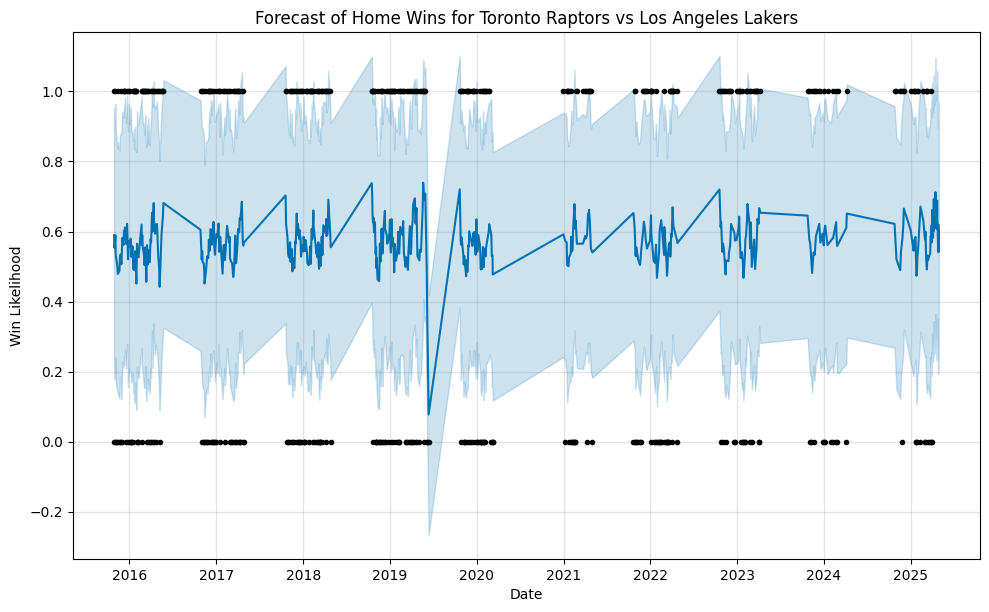

            ds       yhat  yhat_lower  yhat_upper
471 2025-03-31  56.942613   18.850480   92.809698
472 2025-04-01  66.180009   31.015443  102.560889
473 2025-04-02  61.728007   24.903342   98.573486
474 2025-04-03  62.334124   25.442463   99.278470
475 2025-04-04  60.820808   23.194303   97.470230
476 2025-04-05  58.213387   22.672176   94.136870
477 2025-04-06  64.879523   30.500082  102.939742
478 2025-04-07  60.055070   24.254424   95.311288
479 2025-04-08  69.291845   34.386863  104.651339
480 2025-04-09  64.817419   31.894626  100.744764
481 2025-04-10  65.369593   26.765591   98.604741
482 2025-04-11  63.760945   26.732565   98.854703
483 2025-04-12  61.007257   25.016771   96.237656
484 2025-04-13  67.467484   29.882373  102.276327
485 2025-04-14  62.370100   30.086356   98.439699
486 2025-04-15  71.261358   36.437333  109.553810
487 2025-04-16  66.365510   30.792523  101.878267
488 2025-04-17  66.419659   28.726731  102.411506
489 2025-04-18  64.238606   29.518197   98.721217


In [41]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# --- เตรียมข้อมูล ---
# คำนวณค่าว่าชนะในบ้านหรือไม่
df["home_win"] = (df["outcome"] == df["Home/Neutral"]).astype(int)

# เลือกเฉพาะทีมที่ต้องการพยากรณ์ (สามารถเปลี่ยนชื่อทีมได้)
team_name = "Toronto Raptors"
team_df = df[df["outcome"] == team_name].copy()

# เปลี่ยนชื่อคอลัมน์ให้เหมาะกับ Prophet
team_df = team_df.rename(columns={
    "Date": "ds",
    "home_win": "y",
    "A": "visitor_score",
    "B": "home_score",
    "Attend.": "attendance"
})

# --- Drop rows with NaN or non-integer type values

team_df = team_df[team_df['visitor_score'].apply(lambda x: pd.notnull(x) and (isinstance(x, int) or (isinstance(x, float) and x.is_integer())))]
team_df = team_df[team_df['attendance'].apply(lambda x: pd.notnull(x) and (isinstance(x, int) or (isinstance(x, float) and x.is_integer())))]


# --- สร้างโมเดล Prophet พร้อมตัวแปรเสริม ---
model = Prophet()

# เพิ่มตัวแปร external regressors
model.add_regressor("visitor_score")
model.add_regressor("home_score")
model.add_regressor("attendance")

# ฟิตข้อมูลให้โมเดล
model.fit(team_df[["ds", "y", "visitor_score", "home_score", "attendance"]])

# --- เตรียมข้อมูลในอนาคตสำหรับพยากรณ์ ---
# สร้าง dataframe ช่วงเวลาที่ต้องการพยากรณ์ (30 วันเป็นตัวอย่าง)
future = model.make_future_dataframe(periods=30)

# เติมค่า regressors สำหรับอนาคต
# ในที่นี้ใช้ค่าเฉลี่ยจากอดีตเป็นค่าประมาณ (หรือใส่ค่าที่คาดการณ์เองก็ได้)
avg_visitor = team_df["visitor_score"].mean()
avg_home = team_df["home_score"].mean()
avg_attend = team_df["attendance"].mean()

future["visitor_score"] = avg_visitor
future["home_score"] = avg_home
future["attendance"] = avg_attend

# --- ทำนายและแสดงผล ---
forecast = model.predict(future)

# แสดงกราฟการพยากรณ์
fig = model.plot(forecast)
plt.title(f"Forecast of Home Wins for {team_name}")
plt.xlabel("Date")
plt.ylabel("Win Likelihood")
plt.show()

# แสดงผลลัพธ์ตาราง
forecast_result = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(30)
forecast_result.head()


In [42]:
import pandas as pd

# ... (Your previous code for loading and cleaning the data)

# Filter for New York Knicks games
knicks_df = df[(df["Visitor/Neutral"] == "New York Knicks") | (df["Home/Neutral"] == "New York Knicks")]

# Group by year and calculate statistics
knicks_stats = knicks_df.groupby("Year").agg(
    Wins=("outcome", lambda x: (x == "New York Knicks").sum()),  # Count wins
    Losses=("outcome", lambda x: (x != "New York Knicks").sum()),  # Count losses
    Total_Games=("outcome", "count"),  # Total games played
    Average_Points_Scored=("A", "mean"),  # Average points scored by Knicks
    Average_Points_Allowed=("B", "mean")  # Average points allowed by Knicks
)

# Display the statistics
print(knicks_stats)

      Wins  Losses  Total_Games  Average_Points_Scored  Average_Points_Allowed
Year                                                                          
2015    15      18           33              97.727273               99.727273
2016    33      49           82             102.012195              103.975610
2017    33      52           85             102.988235              106.682353
2018    20      63           83             108.289157              111.349398
2019    17      61           78             107.000000              107.371795
2020    18      28           46             109.026316              110.394737
2021    57      51          108             105.259259              105.685185
2022    39      44           83             110.337349              110.048193
2023    51      37           88             111.784091              114.818182
2024    63      33           96             109.635417              111.041667
2025    29      20           49             112.1428

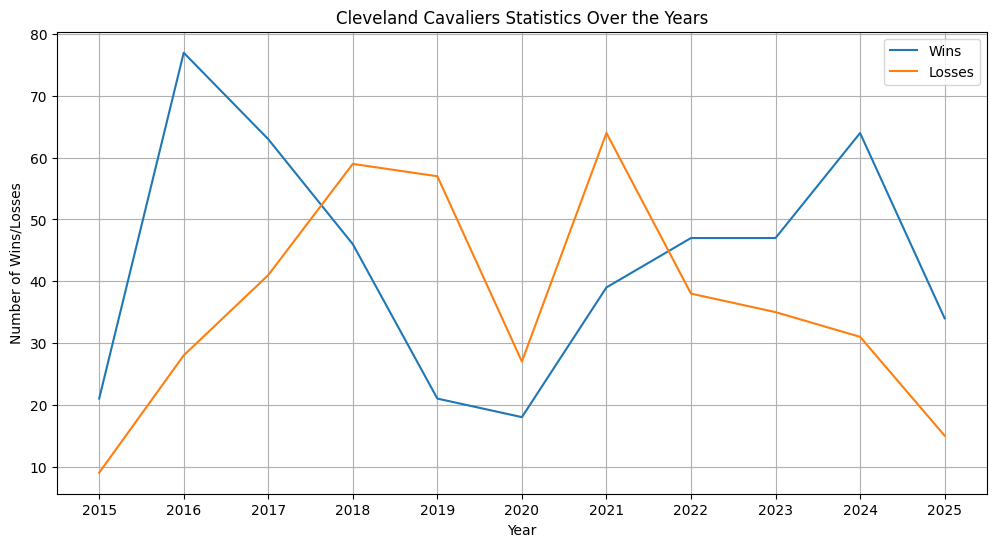

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your previous code for loading and cleaning the data)

def plot_team_stats(team_name):
    """
    Plots the wins and losses of a given NBA team over the years.

    Args:
        team_name (str): The name of the NBA team.
    """
    team_df = df[(df["Visitor/Neutral"] == team_name) | (df["Home/Neutral"] == team_name)]
    team_stats = team_df.groupby("Year").agg(
        Wins=("outcome", lambda x: (x == team_name).sum()),
        Losses=("outcome", lambda x: (x != team_name).sum())
    )

    plt.figure(figsize=(12, 6))
    plt.plot(team_stats.index, team_stats["Wins"], label="Wins")
    plt.plot(team_stats.index, team_stats["Losses"], label="Losses")

    plt.title(f"{team_name} Statistics Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Number of Wins/Losses")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_team_stats("Cleveland Cavaliers")  # Plot for New York Knicks
 # Plot for Los Angeles Lakers
# ... (Call the function with other team names as needed)

In [44]:
df['Visitor/Neutral'].unique()

array(['Minnesota Timberwolves', 'Cleveland Cavaliers', 'Detroit Pistons',
       'Indiana Pacers', 'Charlotte Hornets', 'Portland Trail Blazers',
       'Dallas Mavericks', 'Miami Heat', 'Chicago Bulls',
       'San Antonio Spurs', 'Brooklyn Nets', 'Boston Celtics',
       'Orlando Magic', 'Washington Wizards', 'Milwaukee Bucks',
       'Oklahoma City Thunder', 'Toronto Raptors', 'New Orleans Pelicans',
       'Los Angeles Clippers', 'Denver Nuggets', 'Utah Jazz',
       'Atlanta Hawks', 'New York Knicks', 'Memphis Grizzlies',
       'Houston Rockets', 'Phoenix Suns', 'Sacramento Kings',
       'Philadelphia 76ers', 'Golden State Warriors',
       'Los Angeles Lakers', 'Playoffs'], dtype=object)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoifmsaz5/kmshzhwq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoifmsaz5/nf9qilqc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2047', 'data', 'file=/tmp/tmpoifmsaz5/kmshzhwq.json', 'init=/tmp/tmpoifmsaz5/nf9qilqc.json', 'output', 'file=/tmp/tmpoifmsaz5/prophet_modeluf5v4q1c/prophet_model-20250403061734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:17:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


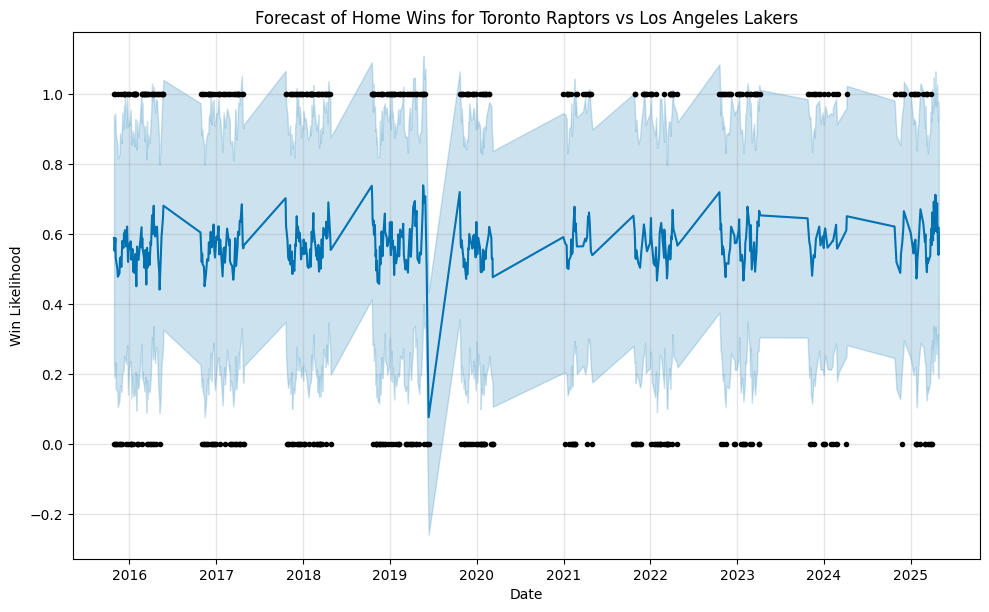

            ds       yhat  yhat_lower  yhat_upper
471 2025-03-31  56.942613   21.034415   94.339858
472 2025-04-01  66.180009   29.851690  101.465142
473 2025-04-02  61.728007   26.877121   97.039311
474 2025-04-03  62.334124   27.747149   96.865208
475 2025-04-04  60.820808   23.031506   94.884513
476 2025-04-05  58.213387   20.285841   95.300776
477 2025-04-06  64.879523   26.637394  100.178977
478 2025-04-07  60.055070   26.131423   95.965538
479 2025-04-08  69.291845   33.854794  104.773942
480 2025-04-09  64.817419   28.421119  100.028016
481 2025-04-10  65.369593   29.080458  100.600938
482 2025-04-11  63.760945   25.654024   99.326076
483 2025-04-12  61.007257   23.780796   97.339415
484 2025-04-13  67.467484   33.121664  103.794969
485 2025-04-14  62.370100   27.091531   96.999068
486 2025-04-15  71.261358   33.498177  106.492363
487 2025-04-16  66.365510   29.421476  100.883611
488 2025-04-17  66.419659   30.435874  102.138794
489 2025-04-18  64.238606   28.065324   98.376494


In [45]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# --- ฟังก์ชันสำหรับการพยากรณ์ ---
def forecast_home_win(team_name_1, team_name_2, df):
    # คำนวณค่าว่าชนะในบ้านหรือไม่
    df["home_win"] = (df["outcome"] == df["Home/Neutral"]).astype(int)

    # เลือกเฉพาะทีมที่ต้องการพยากรณ์
    team_df_1 = df[df["outcome"] == team_name_1].copy()
    team_df_2 = df[df["outcome"] == team_name_2].copy()

    # เปลี่ยนชื่อคอลัมน์ให้เหมาะกับ Prophet
    team_df_1 = team_df_1.rename(columns={
        "Date": "ds",
        "home_win": "y",
        "A": "visitor_score",
        "B": "home_score",
        "Attend.": "attendance"
    })

    team_df_2 = team_df_2.rename(columns={
        "Date": "ds",
        "home_win": "y",
        "A": "visitor_score",
        "B": "home_score",
        "Attend.": "attendance"
    })

    # --- Drop rows with NaN or non-integer type values ---
    team_df_1 = team_df_1.dropna(subset=['visitor_score', 'attendance'])
    team_df_2 = team_df_2.dropna(subset=['visitor_score', 'attendance'])

    # Ensure that 'visitor_score' and 'attendance' are numeric
    team_df_1['visitor_score'] = pd.to_numeric(team_df_1['visitor_score'], errors='coerce')
    team_df_1['attendance'] = pd.to_numeric(team_df_1['attendance'], errors='coerce')

    team_df_2['visitor_score'] = pd.to_numeric(team_df_2['visitor_score'], errors='coerce')
    team_df_2['attendance'] = pd.to_numeric(team_df_2['attendance'], errors='coerce')

    # Remove rows where 'visitor_score' or 'attendance' are still NaN after conversion
    team_df_1 = team_df_1.dropna(subset=['visitor_score', 'attendance'])
    team_df_2 = team_df_2.dropna(subset=['visitor_score', 'attendance'])

    # --- สร้างโมเดล Prophet พร้อมตัวแปรเสริม ---
    model = Prophet()

    # เพิ่มตัวแปร external regressors
    model.add_regressor("visitor_score")
    model.add_regressor("home_score")
    model.add_regressor("attendance")

    # ฟิตข้อมูลให้โมเดล
    model.fit(team_df_1[["ds", "y", "visitor_score", "home_score", "attendance"]])

    # --- เตรียมข้อมูลในอนาคตสำหรับพยากรณ์ ---
    future = model.make_future_dataframe(periods=30)

    # เติมค่า regressors สำหรับอนาคต
    avg_visitor = team_df_1["visitor_score"].mean()
    avg_home = team_df_1["home_score"].mean()
    avg_attend = team_df_1["attendance"].mean()

    future["visitor_score"] = avg_visitor
    future["home_score"] = avg_home
    future["attendance"] = avg_attend

    # --- ทำนายและแสดงผล ---
    forecast = model.predict(future)

    # แสดงกราฟการพยากรณ์
    fig = model.plot(forecast)
    plt.title(f"Forecast of Home Wins for {team_name_1} vs {team_name_2}")
    plt.xlabel("Date")
    plt.ylabel("Win Likelihood")
    plt.show()

    # แสดงผลลัพธ์ตาราง
    forecast_result = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(30)
    forecast_result["yhat"] = forecast_result["yhat"] * 100  # Convert to percentage
    forecast_result["yhat_lower"] = forecast_result["yhat_lower"] * 100  # Convert to percentage
    forecast_result["yhat_upper"] = forecast_result["yhat_upper"] * 100  # Convert to percentage
    return forecast_result

# --- ใช้ฟังก์ชันสำหรับทีมที่ต้องการพยากรณ์ ---
team_name_1 = "Toronto Raptors"
team_name_2 = "Los Angeles Lakers"

# พยากรณ์ผลการชนะในบ้าน
forecast_result = forecast_home_win(team_name_1, team_name_2, df)

# แสดงผลลัพธ์
print(forecast_result)
